## This is the python jupiter notebook file used to extract the performances of matrix inversion from the log files from HPC cluster.

#### The logs are extracted based on a regex

`r"Matrix inversion \(Parallel\) completed in ([\d\.]+) ms for (\d+)x\2 matrix\."` 

for Parallel execution with OpenMP from logs folder

File Formet: `log_ncpu_x.txt` - where last digit(`x`) gives number of ncpus

And this is saved to a csv file called `x.csv` with following format `Matrix Size,Time (ms)`

In [1]:
import os
import re
import csv

log_dir = "./logs"

pattern = re.compile(r"Matrix inversion \(Parallel\) completed in ([\d\.]+) ms for (\d+)x\2 matrix\.")

for filename in os.listdir(log_dir):
    if filename.startswith("log_ncpu_") and filename.endswith(".txt"):
        # Extract the number of CPUs from the filename
        ncpu = filename.split("_")[2].split(".")[0]
        output_csv = f"{ncpu}.csv"

        data = []

        file_path = os.path.join(log_dir, filename)
        with open(file_path, "r") as file:
            content = file.read()
            matches = pattern.findall(content)
            for match in matches:
                time_ms, size = match
                data.append([int(size), float(time_ms)])

        data.sort(key=lambda x: x[0])

        # Write data to a CSV file
        with open(output_csv, "w", newline="") as csvfile:
            csv_writer = csv.writer(csvfile)
            csv_writer.writerow(["Matrix Size", "Time (ms)"])
            csv_writer.writerows(data)

        print(f"Data from {filename} has been successfully extracted and saved to {output_csv}.")


Data from log_ncpu_2.txt has been successfully extracted and saved to 2.csv.
Data from log_ncpu_8.txt has been successfully extracted and saved to 8.csv.
Data from log_ncpu_32.txt has been successfully extracted and saved to 32.csv.
Data from log_ncpu_16.txt has been successfully extracted and saved to 16.csv.
Data from log_ncpu_1.txt has been successfully extracted and saved to 1.csv.
Data from log_ncpu_64.txt has been successfully extracted and saved to 64.csv.


## MPI logs extraction

Here the logs from MPI execution is extracted in similar way was OpenMP.

Regex: `r"Matrix inversion \(Parallel\) completed in ([\d\.]+) ms for (\d+)x\2 matrix\.`

And this is saved to a csv file called `x.csv` inside mpi folder with following format `Matrix Size,Time (ms)`


In [2]:
import os
import re
import csv

log_dir = "./logs"

pattern = re.compile(r"Matrix inversion \(Parallel\) completed in ([\d\.]+) ms for (\d+)x\2 matrix\.")

for filename in os.listdir(log_dir):
    if filename.startswith("mpi_log_ncpu_") and filename.endswith(".txt"):
        ncpu = filename.split("_")[3].split(".")[0]
        output_csv = f"mpi/{ncpu}.csv"

        data = []

        file_path = os.path.join(log_dir, filename)
        with open(file_path, "r") as file:
            content = file.read()
            matches = pattern.findall(content)
            for match in matches:
                time_ms, size = match
                data.append([int(size), float(time_ms)])

        data.sort(key=lambda x: x[0])

        with open(output_csv, "w", newline="") as csvfile:
            csv_writer = csv.writer(csvfile)
            csv_writer.writerow(["Matrix Size", "Time (ms)"])
            csv_writer.writerows(data)

        print(f"Data from {filename} has been successfully extracted and saved to {output_csv}.")


Data from mpi_log_ncpu_16.txt has been successfully extracted and saved to mpi/16.csv.
Data from mpi_log_ncpu_50.txt has been successfully extracted and saved to mpi/50.csv.
Data from mpi_log_ncpu_20.txt has been successfully extracted and saved to mpi/20.csv.
Data from mpi_log_ncpu_4.txt has been successfully extracted and saved to mpi/4.csv.
Data from mpi_log_ncpu_28.txt has been successfully extracted and saved to mpi/28.csv.
Data from mpi_log_ncpu_32.txt has been successfully extracted and saved to mpi/32.csv.
Data from mpi_log_ncpu_40.txt has been successfully extracted and saved to mpi/40.csv.
Data from mpi_log_ncpu_12.txt has been successfully extracted and saved to mpi/12.csv.
Data from mpi_log_ncpu_8.txt has been successfully extracted and saved to mpi/8.csv.
Data from mpi_log_ncpu_1.txt has been successfully extracted and saved to mpi/1.csv.
Data from mpi_log_ncpu_24.txt has been successfully extracted and saved to mpi/24.csv.
Data from mpi_log_ncpu_64.txt has been successful

# Render graphs

### Matrix Inversion Times vs. Matrix Sizes of OpenMP logs

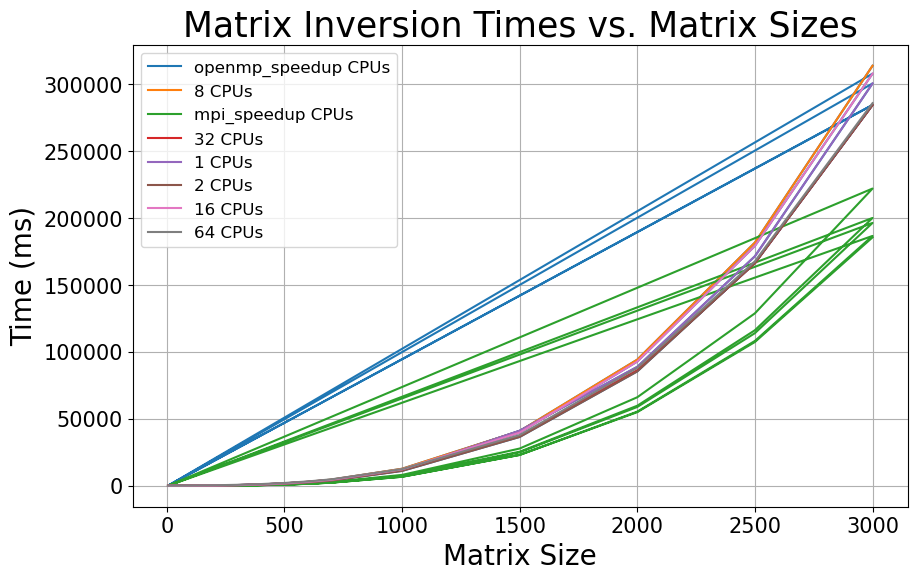

In [23]:
import os
import csv
import matplotlib.pyplot as plt

csv_dir = "./"

cpu_data = {}

for filename in os.listdir(csv_dir):
    if filename.endswith(".csv") and filename != "serial_extracted.csv" and filename != 'combined_data.csv':
        # Extract the number of CPUs from the filename
        ncpu = filename.split(".")[0]

        matrix_sizes = []
        times = []
        with open(os.path.join(csv_dir, filename), "r") as csvfile:
            csv_reader = csv.reader(csvfile)
            next(csv_reader)  # Skip the header row
            for row in csv_reader:
                matrix_sizes.append(int(row[0]))
                times.append(float(row[1]))

        cpu_data[ncpu] = (matrix_sizes, times)

plt.figure(figsize=(10, 6))
for ncpu, (matrix_sizes, times) in cpu_data.items():
    plt.plot(matrix_sizes, times, label=f"{ncpu} CPUs")

plt.title("Matrix Inversion Times vs. Matrix Sizes", fontsize = 25)
plt.xlabel("Matrix Size", fontsize = 20)
plt.ylabel("Time (ms)", fontsize = 20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=12)
plt.grid(True)

plt.show()


### More graphs for OpenMP

1. Speedup vs. Matrix Size
2. Efficiency vs. Matrix Size
3. Execution Time as Bar Chart (Grouped by CPUs)
4. Logarithmic Scale for Time vs. Matrix Size



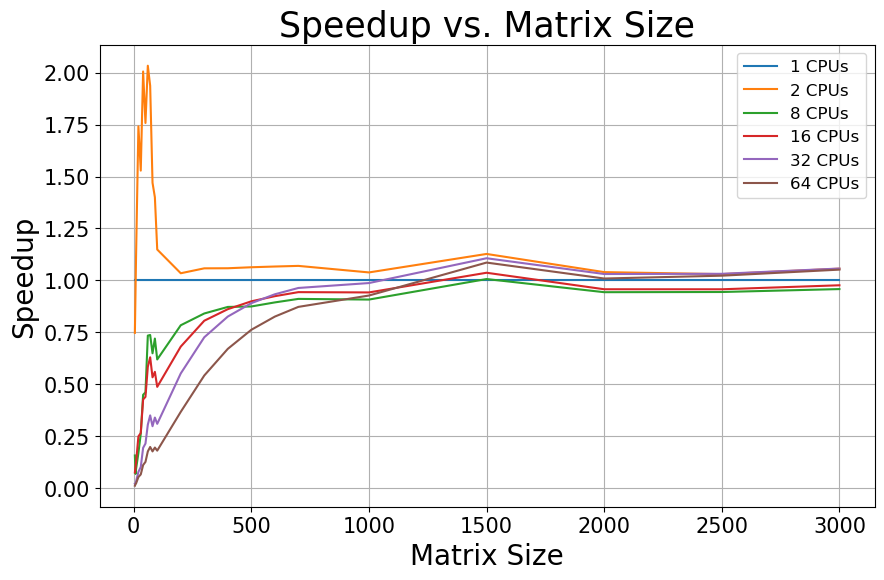

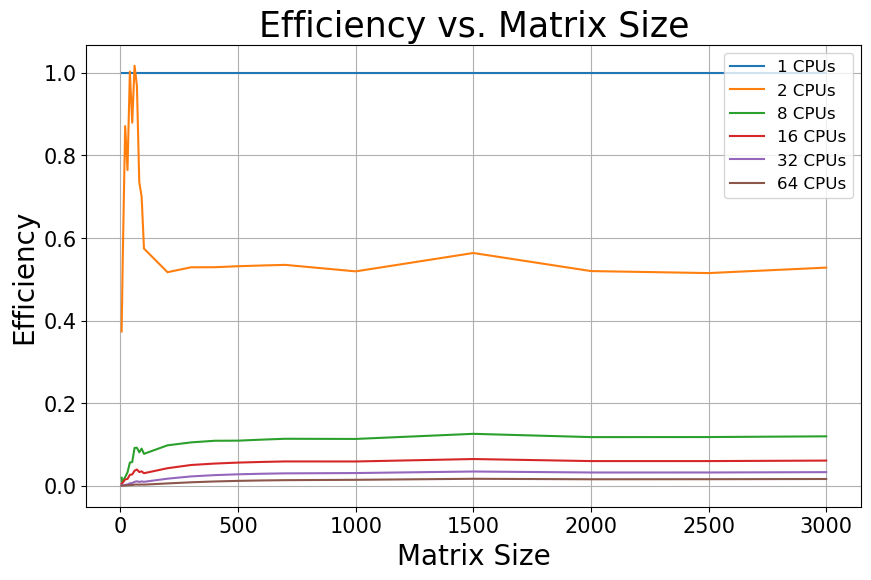

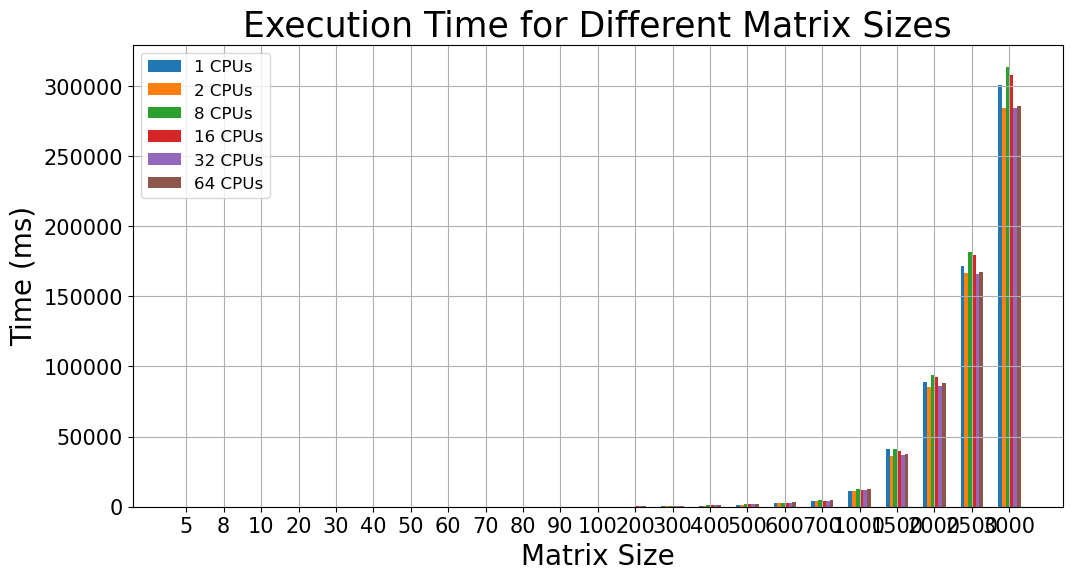

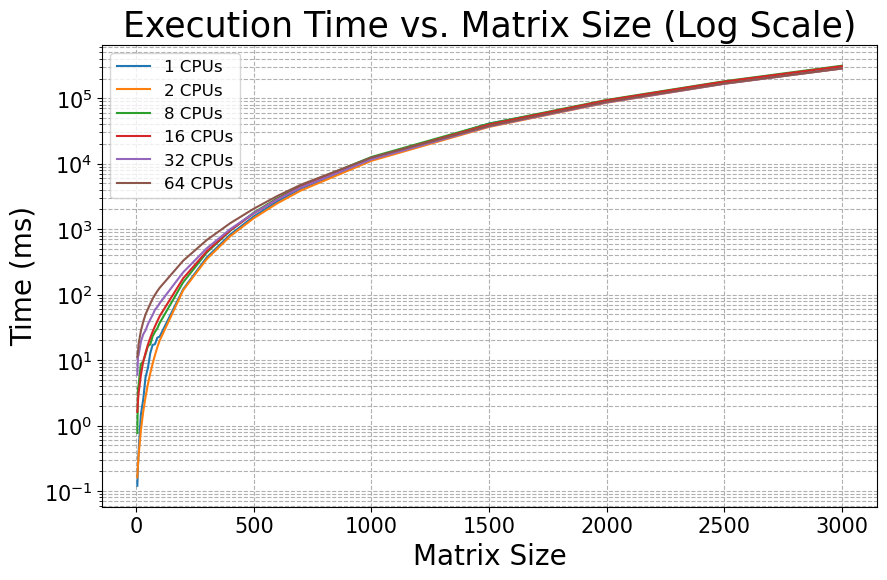

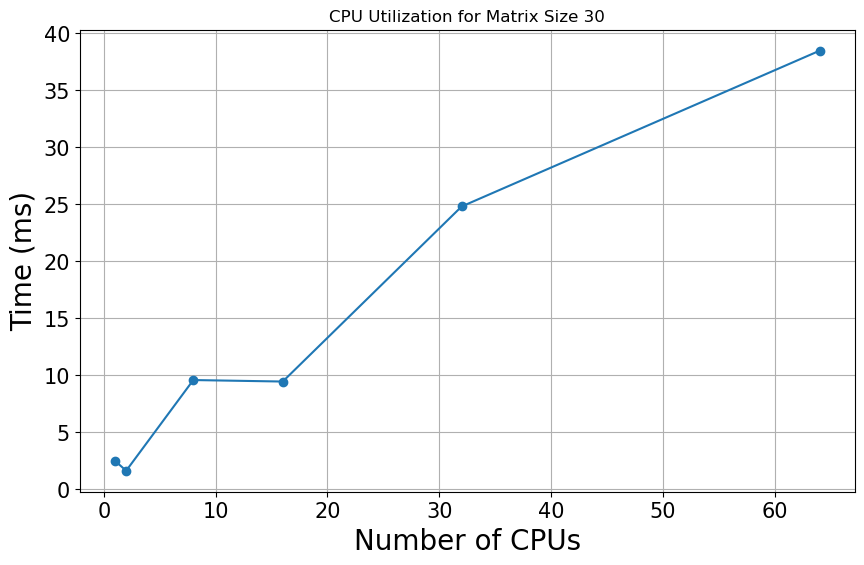

In [24]:
import os
import csv
import matplotlib.pyplot as plt
import numpy as np

csv_dir = "./"

cpu_data = {}

invalid_fnames = [
    "serial_extracted.csv",
    "combined_data.csv",
    "openmp_speedup.csv",
    "mpi_speedup.csv",
]

for filename in os.listdir(csv_dir):
    #if filename.endswith(".csv") and filename != "serial_extracted.csv" and filename != 'combined_data.csv' and filename != 'openmp_speedup.csv':
    if filename.endswith(".csv") and filename not in invalid_fnames:
        # Extract the number of CPUs from the filename
        ncpu = int(filename.split(".")[0])

        # Read data from the CSV file
        matrix_sizes = []
        times = []
        with open(os.path.join(csv_dir, filename), "r") as csvfile:
            csv_reader = csv.reader(csvfile)
            next(csv_reader) 
            for row in csv_reader:
                matrix_sizes.append(int(row[0]))
                times.append(float(row[1]))

        cpu_data[ncpu] = (matrix_sizes, times)

# Sort the CPU data by the number of CPUs
cpu_data = dict(sorted(cpu_data.items()))

# Get the baseline (single CPU data)
baseline_ncpu = min(cpu_data.keys())
baseline_sizes, baseline_times = cpu_data[baseline_ncpu]

# 1. Speedup vs. Matrix Size
plt.figure(figsize=(10, 6))
for ncpu, (matrix_sizes, times) in cpu_data.items():
    speedup = [baseline_times[i] / t for i, t in enumerate(times)]
    plt.plot(matrix_sizes, speedup, label=f"{ncpu} CPUs")

plt.title("Speedup vs. Matrix Size", fontsize=25)
plt.xlabel("Matrix Size", fontsize=20)
plt.ylabel("Speedup", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# 2. Efficiency vs. Matrix Size
plt.figure(figsize=(10, 6))
for ncpu, (matrix_sizes, times) in cpu_data.items():
    speedup = [baseline_times[i] / t for i, t in enumerate(times)]
    efficiency = [s / ncpu for s in speedup]
    plt.plot(matrix_sizes, efficiency, label=f"{ncpu} CPUs")

plt.title("Efficiency vs. Matrix Size", fontsize=25)
plt.xlabel("Matrix Size", fontsize=20)
plt.ylabel("Efficiency", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# 3. Execution Time as Bar Chart (Grouped by CPUs)
matrix_sizes = baseline_sizes
x = np.arange(len(matrix_sizes))
width = 0.1

plt.figure(figsize=(12, 6))
for i, (ncpu, (matrix_sizes, times)) in enumerate(cpu_data.items()):
    plt.bar(x + i * width, times, width, label=f"{ncpu} CPUs")

plt.title("Execution Time for Different Matrix Sizes", fontsize=25)
plt.xlabel("Matrix Size", fontsize=20)
plt.ylabel("Time (ms)", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(x + width * (len(cpu_data) - 1) / 2, matrix_sizes)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# 4. Logarithmic Scale for Time vs. Matrix Size
plt.figure(figsize=(10, 6))
for ncpu, (matrix_sizes, times) in cpu_data.items():
    plt.plot(matrix_sizes, times, label=f"{ncpu} CPUs")

plt.yscale("log")
plt.title("Execution Time vs. Matrix Size (Log Scale)", fontsize=25)
plt.xlabel("Matrix Size", fontsize=20)
plt.ylabel("Time (ms)", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=12)
plt.grid(True, which="both", linestyle="--")
plt.show()

# 5. CPU Utilization for Fixed Matrix Size
fixed_size_index = 4  # Change this index to select a different matrix size (0-based)
matrix_size_label = baseline_sizes[fixed_size_index]
cpu_counts = []
times_for_fixed_size = []

for ncpu, (matrix_sizes, times) in cpu_data.items():
    cpu_counts.append(ncpu)
    times_for_fixed_size.append(times[fixed_size_index])

plt.figure(figsize=(10, 6))
plt.plot(cpu_counts, times_for_fixed_size, marker="o")
plt.title(f"CPU Utilization for Matrix Size {matrix_size_label}")
plt.xlabel("Number of CPUs", fontsize=20)
plt.ylabel("Time (ms)", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)
plt.show()


### RENDER MPI GRAPHS

Matrix Inversion Times vs. Matrix Sizes

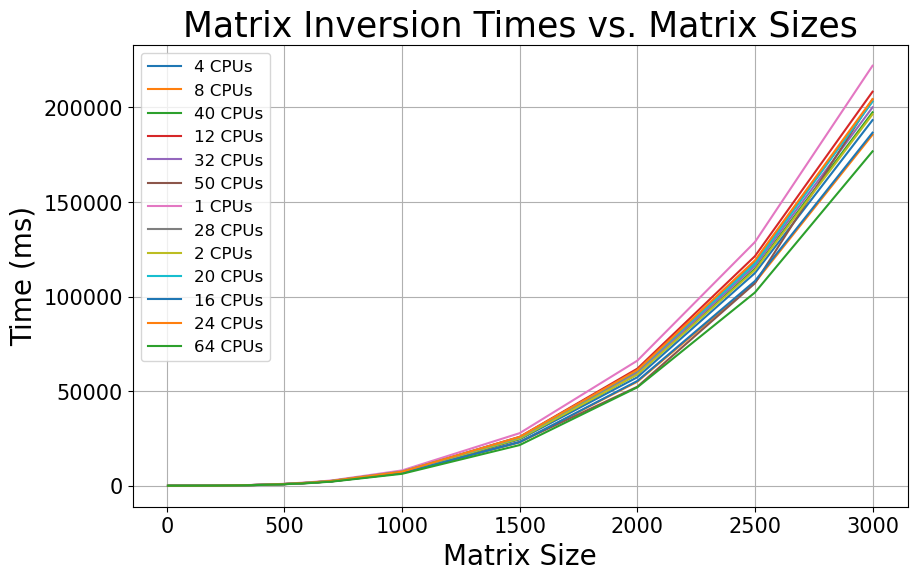

In [26]:
import os
import csv
import matplotlib.pyplot as plt


csv_dir = "./mpi/"


cpu_data = {}

# Loop through all files in the CSV directory
for filename in os.listdir(csv_dir):
    if filename.endswith(".csv"):
        # Extract the number of CPUs from the filename
        ncpu = filename.split(".")[0]

        
        matrix_sizes = []
        times = []
        with open(os.path.join(csv_dir, filename), "r") as csvfile:
            csv_reader = csv.reader(csvfile)
            next(csv_reader)  # Skip the header row
            for row in csv_reader:
                matrix_sizes.append(int(row[0]))
                times.append(float(row[1]))

        cpu_data[ncpu] = (matrix_sizes, times)


plt.figure(figsize=(10, 6))
for ncpu, (matrix_sizes, times) in cpu_data.items():
    plt.plot(matrix_sizes, times, label=f"{ncpu} CPUs")

plt.title("Matrix Inversion Times vs. Matrix Sizes", fontsize=25)
plt.xlabel("Matrix Size", fontsize=20)
plt.ylabel("Time (ms)", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=12)
plt.grid(True)

plt.show()



1. Speedup vs. Matrix Size
2. Efficiency vs. Matrix Size
3. Execution Time as Bar Chart (Grouped by CPUs)
4. Logarithmic Scale for Time vs. Matrix Size

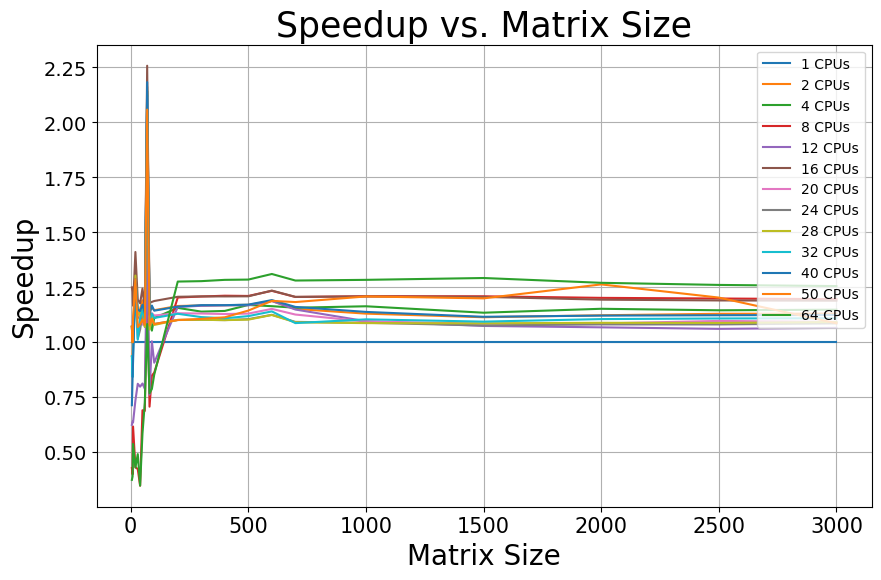

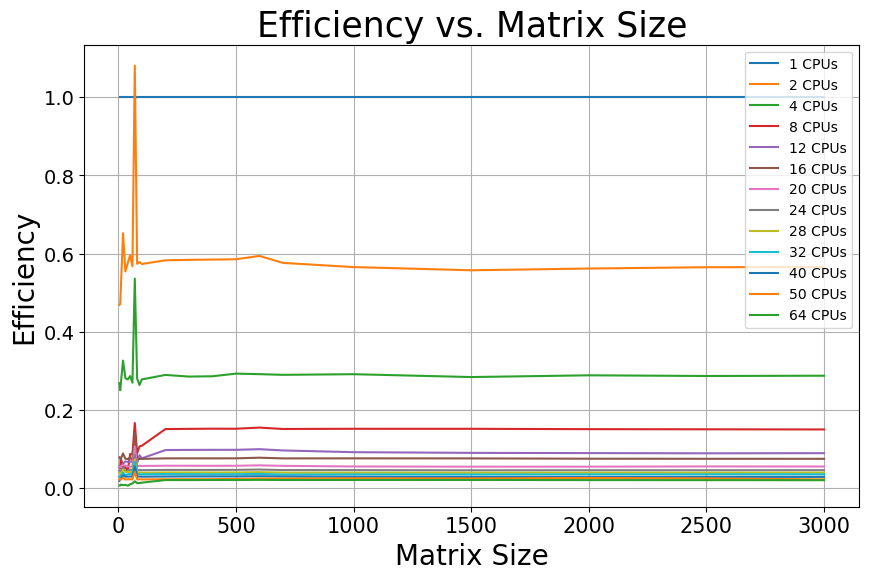

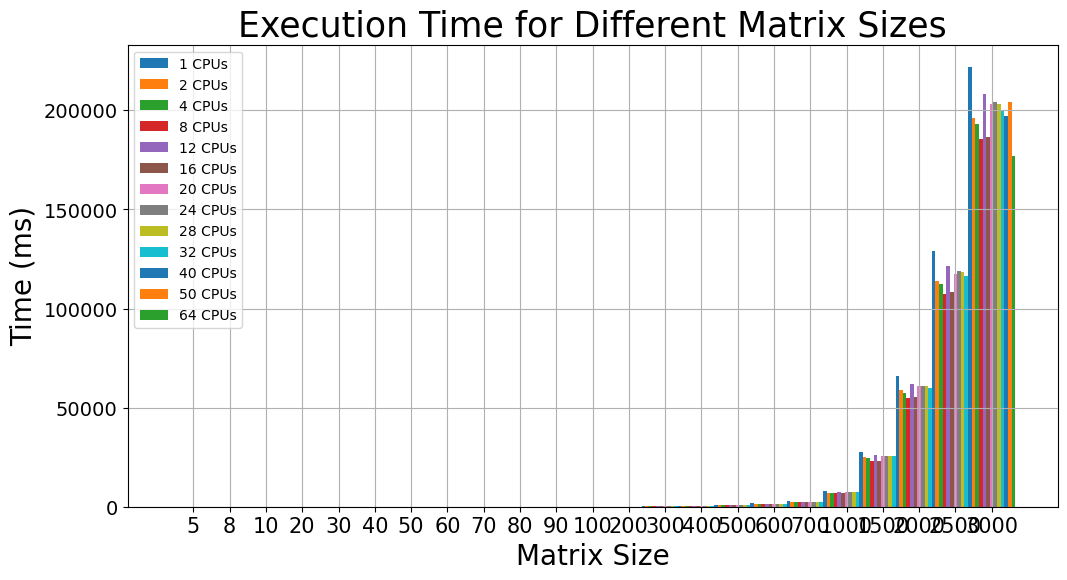

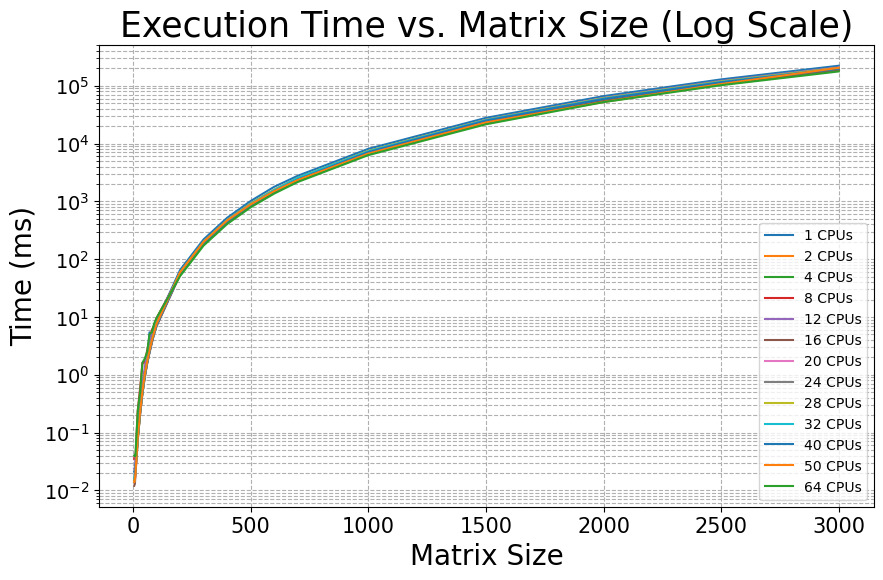

In [27]:
import os
import csv
import matplotlib.pyplot as plt
import numpy as np

csv_dir = "./mpi/"

cpu_data = {}

# Loop through all files in the CSV directory
for filename in os.listdir(csv_dir):
    if filename.endswith(".csv"):
        # Extract the number of CPUs from the filename
        ncpu = int(filename.split(".")[0])

        matrix_sizes = []
        times = []
        with open(os.path.join(csv_dir, filename), "r") as csvfile:
            csv_reader = csv.reader(csvfile)
            next(csv_reader)  # Skip the header row
            for row in csv_reader:
                matrix_sizes.append(int(row[0]))
                times.append(float(row[1]))

        # Store the data
        cpu_data[ncpu] = (matrix_sizes, times)

# Sort the CPU data by the number of CPUs
cpu_data = dict(sorted(cpu_data.items()))

# Get the baseline (single CPU data)
baseline_ncpu = min(cpu_data.keys())
baseline_sizes, baseline_times = cpu_data[baseline_ncpu]

# 1. Speedup vs. Matrix Size
plt.figure(figsize=(10, 6))
for ncpu, (matrix_sizes, times) in cpu_data.items():
    speedup = [baseline_times[i] / t for i, t in enumerate(times)]
    plt.plot(matrix_sizes, speedup, label=f"{ncpu} CPUs")

plt.title("Speedup vs. Matrix Size", fontsize=25)
plt.xlabel("Matrix Size", fontsize=20)
plt.ylabel("Speedup", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

# 2. Efficiency vs. Matrix Size
plt.figure(figsize=(10, 6))
for ncpu, (matrix_sizes, times) in cpu_data.items():
    speedup = [baseline_times[i] / t for i, t in enumerate(times)]
    efficiency = [s / ncpu for s in speedup]
    plt.plot(matrix_sizes, efficiency, label=f"{ncpu} CPUs")

plt.title("Efficiency vs. Matrix Size", fontsize=25)
plt.xlabel("Matrix Size", fontsize=20)
plt.ylabel("Efficiency", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

# 3. Execution Time as Bar Chart (Grouped by CPUs)
matrix_sizes = baseline_sizes
x = np.arange(len(matrix_sizes))
width = 0.1

plt.figure(figsize=(12, 6))
for i, (ncpu, (matrix_sizes, times)) in enumerate(cpu_data.items()):
    plt.bar(x + i * width, times, width, label=f"{ncpu} CPUs")

plt.title("Execution Time for Different Matrix Sizes", fontsize=25)
plt.xlabel("Matrix Size", fontsize=20)
plt.ylabel("Time (ms)", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=14)
plt.xticks(x + width * (len(cpu_data) - 1) / 2, matrix_sizes)
plt.legend()
plt.grid(True)
plt.show()

# 4. Logarithmic Scale for Time vs. Matrix Size
plt.figure(figsize=(10, 6))
for ncpu, (matrix_sizes, times) in cpu_data.items():
    plt.plot(matrix_sizes, times, label=f"{ncpu} CPUs")

plt.yscale("log")
plt.title("Execution Time vs. Matrix Size (Log Scale)", fontsize=25)
plt.xlabel("Matrix Size", fontsize=20)
plt.ylabel("Time (ms)", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=14)
plt.legend()
plt.grid(True, which="both", linestyle="--")
plt.show()



## SERIAL Execution log extraction

Regex: `Matrix inversion \(Serial\) completed in ([\d\.]+) ms for (\d+)x\d+ matrix\.`

Saved to `serial_extracted.csv` file

In [17]:
import re
import pandas as pd

def extract_serial_log(input_file, output_csv):

    with open(input_file, "r") as file:
        log_content = file.read()

    pattern = r"Matrix inversion \(Serial\) completed in ([\d\.]+) ms for (\d+)x\d+ matrix\."

    # Extract data using regex
    matches = re.findall(pattern, log_content)

    data = [{"Matrix Size": int(size), "Time (ms)": float(time)} for time, size in matches]
    df = pd.DataFrame(data)

    df.to_csv(output_csv, index=False)

    print(f"Extracted data saved to {output_csv}")

input_file = "./logs/serial_log.txt"
output_csv = "serial_extracted.csv"
extract_serial_log(input_file, output_csv)


Extracted data saved to serial_extracted.csv


# Combine Serial, OpenMP and MPI logs to one file


##### For this files from OpenMP(ncpu: 1,2,8,16,32) MPI(ncpu: 1,2,8,16,32) is choosed
##### And added to a folder `Comparison_modified_data` and a single csv file is generated

Saved to file: `combined_data.csv`

In [18]:
import pandas as pd
import os

file_paths = {
    "OpenMP_1": "Comparison_modified_data/1.csv",
    "OpenMP_2": "Comparison_modified_data/2.csv",
    "OpenMP_8": "Comparison_modified_data/8.csv",
    "OpenMP_16": "Comparison_modified_data/16.csv",
    "OpenMP_32": "Comparison_modified_data/32.csv",
    "MPI_1": "Comparison_modified_data/mpi_1.csv",
    "MPI_2": "Comparison_modified_data/mpi_2.csv",
    "MPI_8": "Comparison_modified_data/mpi_8.csv",
    "MPI_16": "Comparison_modified_data/mpi_16.csv",
    "MPI_32": "Comparison_modified_data/mpi_32.csv",
    "Serial": "Comparison_modified_data/serial_extracted.csv",
}

dataframes = []
for key, path in file_paths.items():
    df = pd.read_csv(path)
    df["Type"] = key  # Add a column to indicate the source (e.g., CPU_1, MPI_1, Serial)
    dataframes.append(df)

combined_df = pd.concat(dataframes, ignore_index=True)

combined_csv_path = "combined_data.csv"
combined_df.to_csv(combined_csv_path, index=False)

combined_csv_path


'combined_data.csv'

### Graphs

1. Matrix Inversion Time vs Matrix Size
2. Average Matrix Inversion Time by Type
3. Maximum Matrix Inversion Time by Type

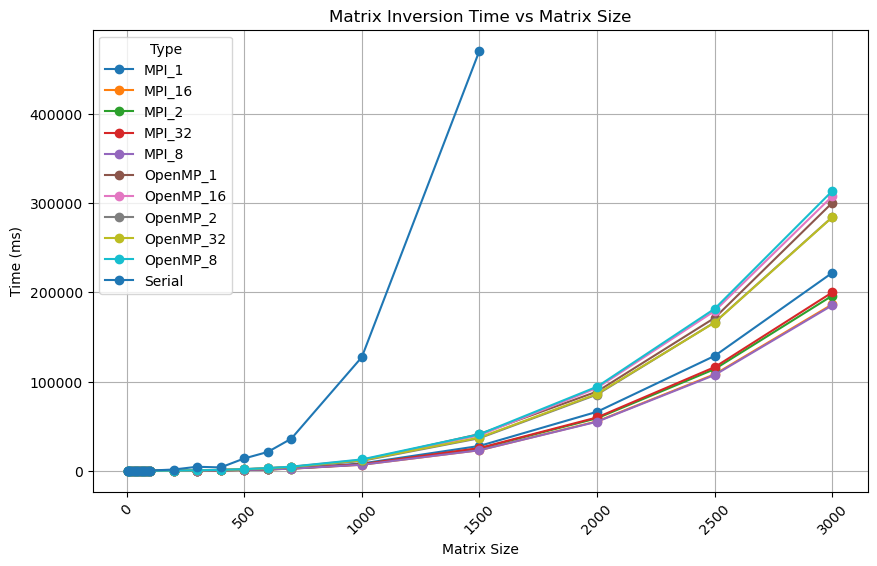

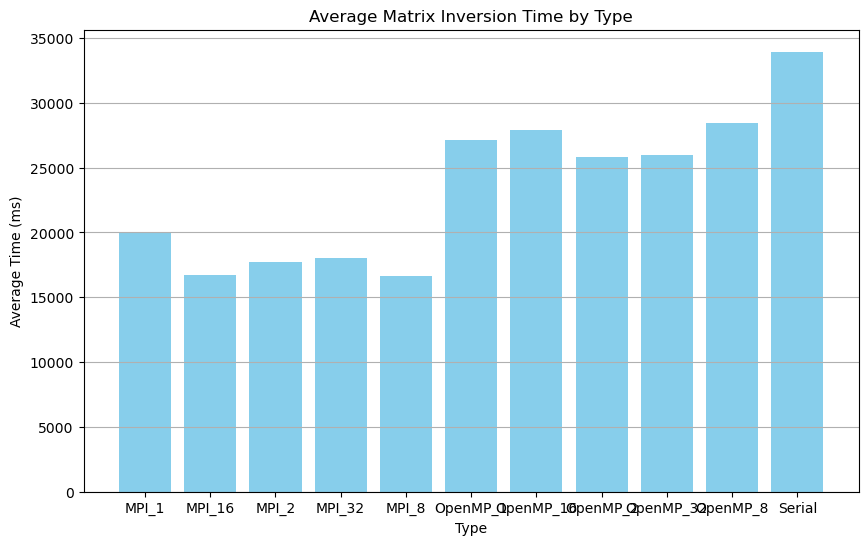

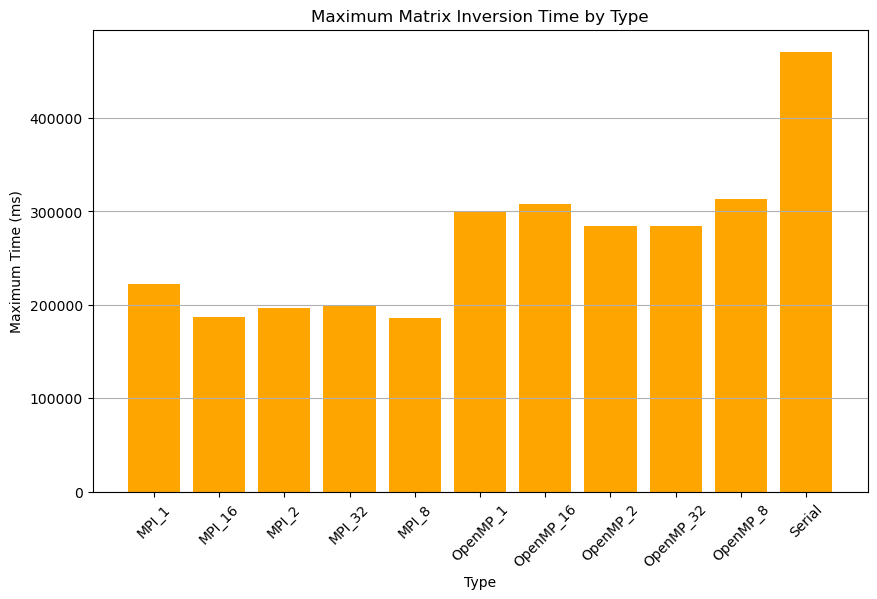

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "combined_data.csv"
data = pd.read_csv(file_path)

data["Matrix Size"] = pd.to_numeric(data["Matrix Size"], errors="coerce")
data["Time (ms)"] = pd.to_numeric(data["Time (ms)"], errors="coerce")
data = data.dropna(subset=["Matrix Size", "Time (ms)"])

def plot_time_vs_matrix_size(data):
    plt.figure(figsize=(10, 6))
    for type_name, group in data.groupby("Type"):
        plt.plot(group["Matrix Size"].values, group["Time (ms)"].values, label=type_name, marker='o')

    plt.title("Matrix Inversion Time vs Matrix Size")
    plt.xlabel("Matrix Size")
    plt.xticks(rotation=45)
    plt.ylabel("Time (ms)")
    plt.legend(title="Type")
    plt.grid(True)
    plt.show()

# Function to plot average time for each type
def plot_average_time(data):
    avg_data = data.groupby("Type")["Time (ms)"].mean().reset_index()
    plt.figure(figsize=(10, 6))
    plt.bar(avg_data["Type"], avg_data["Time (ms)"], color='skyblue')

    plt.title("Average Matrix Inversion Time by Type")
    plt.xlabel("Type")
    
    plt.ylabel("Average Time (ms)")
    plt.grid(axis='y')
    plt.show()

# Function to plot maximum time for each type
def plot_max_time(data):
    max_data = data.groupby("Type")["Time (ms)"].max().reset_index()
    plt.figure(figsize=(10, 6))
    plt.bar(max_data["Type"], max_data["Time (ms)"], color='orange')

    plt.title("Maximum Matrix Inversion Time by Type")
    plt.xlabel("Type")
    plt.xticks(rotation=45)

    plt.ylabel("Maximum Time (ms)")
    plt.grid(axis='y')
    plt.show()

# Generate the graphs
plot_time_vs_matrix_size(data)
plot_average_time(data)
plot_max_time(data)


### Calculate the speedup based on serial and parallel executions

/tmp/ipykernel_865444/741369913.py:45: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  openmp_data = openmp_data.groupby("Type").apply(lambda x: calculate_speedup(x, serial_data)).reset_index(drop=True)
/tmp/ipykernel_865444/741369913.py:46: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  mpi_data = mpi_data.groupby("Type").apply(lambda x: calculate_speedup(x, serial_data)).reset_index(drop=True)


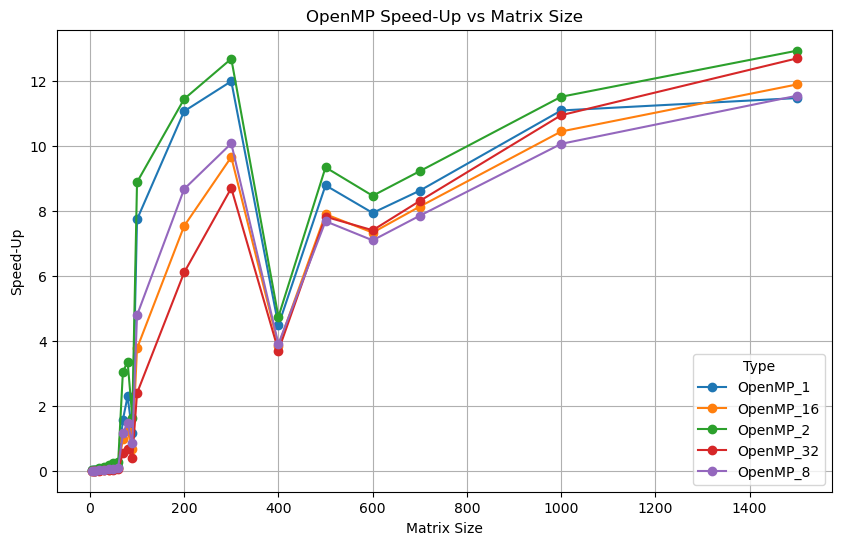

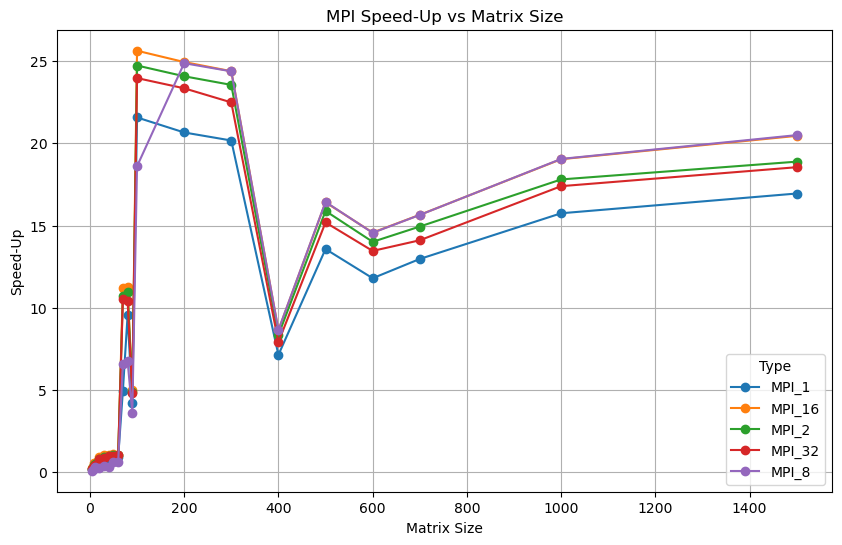

Speed-up calculations and plots are complete!


In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths for input data
file_paths = {
    "OpenMP_1": "Comparison_modified_data/1.csv",
    "OpenMP_2": "Comparison_modified_data/2.csv",
    "OpenMP_8": "Comparison_modified_data/8.csv",
    "OpenMP_16": "Comparison_modified_data/16.csv",
    "OpenMP_32": "Comparison_modified_data/32.csv",
    "MPI_1": "Comparison_modified_data/mpi_1.csv",
    "MPI_2": "Comparison_modified_data/mpi_2.csv",
    "MPI_8": "Comparison_modified_data/mpi_8.csv",
    "MPI_16": "Comparison_modified_data/mpi_16.csv",
    "MPI_32": "Comparison_modified_data/mpi_32.csv",
    "Serial": "Comparison_modified_data/serial_extracted.csv",
}

# Read and combine data from all files
dataframes = []
for key, path in file_paths.items():
    df = pd.read_csv(path)
    df["Type"] = key  # Add a column to identify the type
    dataframes.append(df)

# Combine all data into a single DataFrame
combined_data = pd.concat(dataframes, ignore_index=True)

# Extract Serial times for comparison
serial_data = combined_data[combined_data["Type"] == "Serial"].set_index("Matrix Size")["Time (ms)"]

# Calculate speed-up for OpenMP and MPI
def calculate_speedup(data, serial_data):
    # Align Matrix Size values with Serial data
    matrix_sizes = data["Matrix Size"].to_numpy()  # Ensure 1D NumPy array
    serial_times = serial_data.reindex(matrix_sizes).to_numpy()  # Align with matrix sizes and ensure 1D
    serial_times = serial_times.flatten()  # Flatten in case of unexpected multi-dimensional output
    data["Speed-Up"] = serial_times / data["Time (ms)"].to_numpy()  # Ensure 1D arrays for division
    return data.reset_index(drop=True)  # Reset index to avoid ambiguity

# Split and calculate speed-up for OpenMP and MPI
openmp_data = combined_data[combined_data["Type"].str.startswith("OpenMP")]
mpi_data = combined_data[combined_data["Type"].str.startswith("MPI")]

openmp_data = openmp_data.groupby("Type").apply(lambda x: calculate_speedup(x, serial_data)).reset_index(drop=True)
mpi_data = mpi_data.groupby("Type").apply(lambda x: calculate_speedup(x, serial_data)).reset_index(drop=True)

# Save the calculated speed-up data
openmp_data.to_csv("openmp_speedup.csv", index=False)
mpi_data.to_csv("mpi_speedup.csv", index=False)

def plot_speedup(data, title, output_file):
    plt.figure(figsize=(10, 6))
    for type_name, group in data.groupby("Type"):
        # Ensure all data passed to the plot is 1D
        x = group["Matrix Size"].to_numpy()
        y = group["Speed-Up"].to_numpy()
        plt.plot(x, y, label=type_name, marker='o')
    plt.title(title)
    plt.xlabel("Matrix Size")
    plt.ylabel("Speed-Up")
    plt.legend(title="Type")
    plt.grid(True)
    plt.show()

plot_speedup(openmp_data, "OpenMP Speed-Up vs Matrix Size", "openmp_speedup.png")
plot_speedup(mpi_data, "MPI Speed-Up vs Matrix Size", "mpi_speedup.png")

print("Speed-up calculations and plots are complete!")


## Table

#### Calculate average time per matrix size for OpenMP, MPI, and Serial


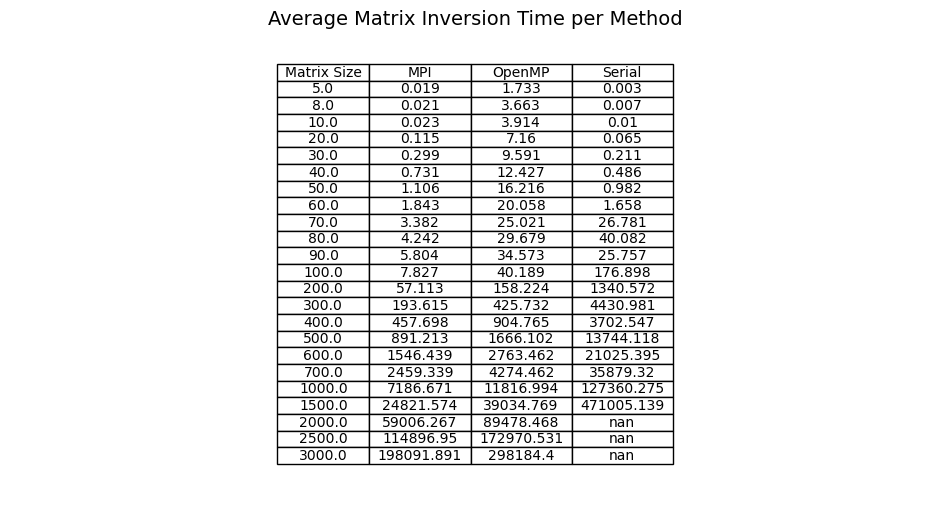

In [30]:

# Load the combined data from CSV
file_path = "combined_data.csv"  # Replace with your file path
# Reload the updated CSV file to ensure all formats are included
combined_data = pd.read_csv(file_path)

# Categorize data by method (OpenMP, MPI, Serial)
combined_data["Method"] = combined_data["Type"].apply(
    lambda x: "OpenMP" if "OpenMP" in x else ("MPI" if "MPI" in x else "Serial")
)

# Compute the average time per matrix size for each method
average_table = combined_data.pivot_table(
    values="Time (ms)",
    index="Matrix Size",
    columns="Method",
    aggfunc="mean"
).reset_index()

def plot_average_table(data):
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.axis('tight')
    ax.axis('off')

    # Convert DataFrame to a table
    table = ax.table(
        cellText=data.round(3).values,  # Rounded values for better display
        colLabels=data.columns,
        cellLoc='center',
        loc='center'
    )
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.auto_set_column_width(col=list(range(len(data.columns))))

    plt.title("Average Matrix Inversion Time per Method", fontsize=14)
    plt.show()

plot_average_table(average_table)


### Graph of matrixes of size 50, 400, 1000 and 3000 against different CPU loads

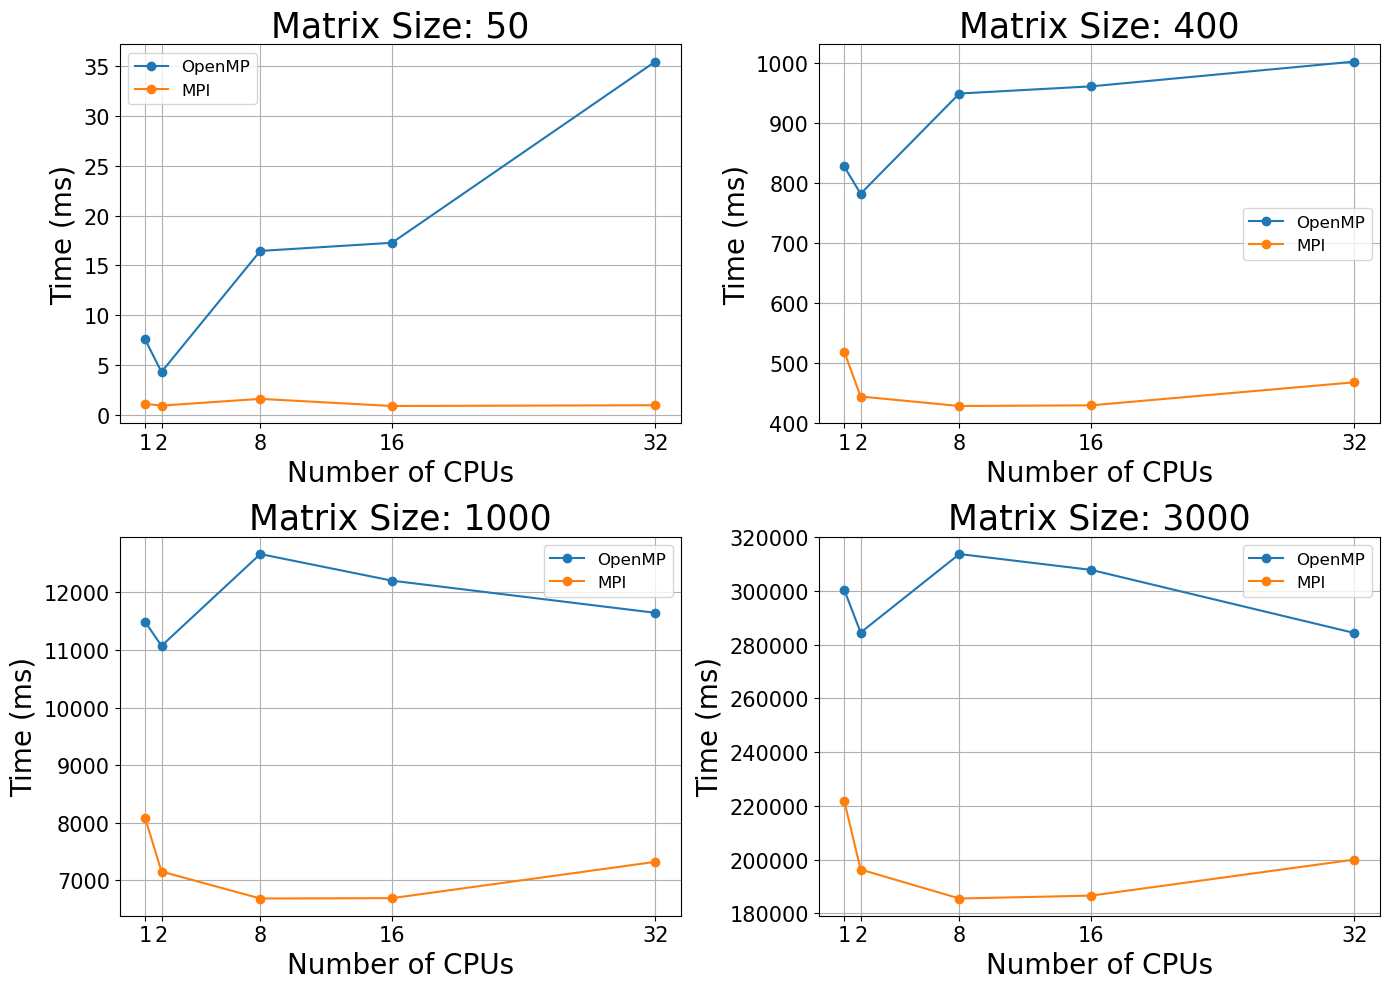

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths
file_paths = {
    "OpenMP_1": "Comparison_modified_data/1.csv",
    "OpenMP_2": "Comparison_modified_data/2.csv",
    "OpenMP_8": "Comparison_modified_data/8.csv",
    "OpenMP_16": "Comparison_modified_data/16.csv",
    "OpenMP_32": "Comparison_modified_data/32.csv",
    "MPI_1": "Comparison_modified_data/mpi_1.csv",
    "MPI_2": "Comparison_modified_data/mpi_2.csv",
    "MPI_8": "Comparison_modified_data/mpi_8.csv",
    "MPI_16": "Comparison_modified_data/mpi_16.csv",
    "MPI_32": "Comparison_modified_data/mpi_32.csv",
}

# CPU counts for OpenMP and MPI
cpu_counts = [1, 2, 8, 16, 32]

matrix_sizes = [50, 400, 1000, 3000]

def load_data(file_path, matrix_sizes):
    df = pd.read_csv(file_path)
    return df[df['Matrix Size'].isin(matrix_sizes)]

data = {'OpenMP': {}, 'MPI': {}}
for key, path in file_paths.items():
    impl = "MPI" if "MPI" in key else "OpenMP"
    ncpus = int(key.split("_")[-1])
    data[impl][ncpus] = load_data(path, matrix_sizes)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, size in enumerate(matrix_sizes):
    ax = axes[i]
    for impl, impl_data in data.items():
        times = []
        for ncpus in cpu_counts:
            try:
                time = impl_data[ncpus][impl_data[ncpus]['Matrix Size'] == size]['Time (ms)'].values[0]
            except (KeyError, IndexError):
                time = None  # Use None or NaN for missing data
            times.append(time)
        
        # Filter out None values for plotting
        valid_data = [(cpu, t) for cpu, t in zip(cpu_counts, times) if t is not None]
        if valid_data:
            valid_cpus, valid_times = zip(*valid_data)
            ax.plot(valid_cpus, valid_times, marker='o', label=impl)
    
    ax.set_title(f"Matrix Size: {size}", fontsize=25)
    ax.set_xlabel("Number of CPUs", fontsize=20)
    ax.set_ylabel("Time (ms)", fontsize=20)
    ax.set_xticks(cpu_counts)
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    ax.legend(fontsize=12)
    ax.grid(True)

plt.tight_layout()
plt.show()
